# IBM cloud deployment

Team ID - PNT2022TMID05025

# Importing the required libraries

In [ ]:
!pip install tensorflow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 16 kB/s 
     |████████████████████████████████| 1.7 MB 49.1 MB/s 
     |████████████████████████████████| 438 kB 58.0 MB/s 
     |████████████████████████████████| 5.9 MB 39.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [ ]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #convolutional Layer
from keras.utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

# Load data

In [ ]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

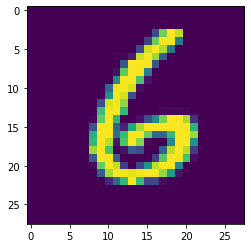

In [ ]:
plt.imshow(x_train[6000])     #ploting the index=image

In [ ]:
np.argmax(y_train[6000])

0

# Reshaping Dataset

In [ ]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

# Applying One Hot Encoding

In [ ]:
number_of_classes = 10  #storing the no of classes in a variable

In [ ]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

Add CNN Layers

In [ ]:
#create model
model=Sequential ()

In [ ]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [ ]:
#flatten the dimension of the image
model.add(Flatten())

In [ ]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

# Compiling the model

In [ ]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [ ]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

# Train the model

In [ ]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 190s 101ms/step - loss: 0.0159 - accuracy: 0.9958 - val_loss: 0.1763 - val_accuracy: 0.9789
Epoch 2/5
1875/1875 [==============================] - 185s 99ms/step - loss: 0.0154 - accuracy: 0.9968 - val_loss: 0.1729 - val_accuracy: 0.9787
Epoch 3/5
1875/1875 [==============================] - 184s 98ms/step - loss: 0.0132 - accuracy: 0.9971 - val_loss: 0.1894 - val_accuracy: 0.9800
Epoch 4/5
1875/1875 [==============================] - 186s 99ms/step - loss: 0.0197 - accuracy: 0.9963 - val_loss: 0.2278 - val_accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 186s 99ms/step - loss: 0.0158 - accuracy: 0.9970 - val_loss: 0.2590 - val_accuracy: 0.9807


# Observing the metrics

In [ ]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.1913944035768509, 0.9782000184059143]



# Test The Model

In [ ]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 158ms/step
[[3.3685468e-23 6.7805488e-32 7.7905596e-25 4.4999151e-09 1.1806234e-04
  6.6805527e-15 3.7942914e-20 1.1079325e-11 3.7944363e-05 9.9984396e-01]]


In [ ]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [ ]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

# Save The model

In [ ]:
# Save the model
model.save('models/mnistCNN.h5')

In [ ]:
cd models

/content/models


In [ ]:
!tar -zcvf handwritten-digit-recognition-model_new.tgz mnistCNN.h5

mnistCNN.h5


In [ ]:
!pip install watson-machine-learning-client --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 5.3 MB/s 
     |████████████████████████████████| 132 kB 28.7 MB/s 
     |████████████████████████████████| 55 kB 3.2 MB/s 
     |████████████████████████████████| 9.9 MB 41.6 MB/s 
     |████████████████████████████████| 79 kB 6.3 MB/s 
     |████████████████████████████████| 140 kB 34.5 MB/s 
     |████████████████████████████████| 956 kB 43.2 MB/s 
     |████████████████████████████████| 135 kB 42.8 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73931 sha256=78a9c042bc2ca8a9fe8162d7c7c703d38b575d152009b24dd2b284d4aa1dd7d1
  Stored in directory: /root/.cache/pip/wheels/ec/94/29/2b57327cf00664b6614304f7958abd29d77ea0e5bbece2ea57
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-none-any.whl size=562962 sha256=d4c115ac44f